In [25]:
from model import LinearRegression
from scaler import StandardScaler
import numpy as np
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
train_data = pd.read_csv('input\\train.csv', encoding='big5')
train_data.drop(columns=u'測站', inplace=True)
train_data.replace('NR', 0, inplace=True)

for i in range(24):
    train_data['%d' % i] = train_data['%d' % i].astype('float64')
measure_name = train_data.iloc[0:18, 1]

result = []
day = 1
month = 1

for i in range(0, train_data.shape[0], 18):
    temp = train_data.iloc[i:i+18, 2:].T
    temp.columns = measure_name
    temp.insert(loc=0, column='month', value='%d' % month)
    temp.insert(loc=1, column='day', value='%d' % day)
    temp.insert(loc=2, column='hr', value=temp.index)
    result.append(temp)
    if day < 20:
        day += 1
    else:
        day = 1
        month += 1
train = pd.concat(result, ignore_index=True)
train.columns.name = None

test_data = pd.read_csv('input\\test.csv', header=None, encoding='big5')
test_data.replace('NR', 0, inplace=True)
for i in range(2, 11):
    test_data.iloc[:, i] = test_data.iloc[:, i].astype('float64')
measure_name = test_data.iloc[0:18, 1]

result = []
id_ = 0

for i in range(0, test_data.shape[0], 18):
    temp = test_data.iloc[i:i+18, 2:].T
    temp.columns = measure_name
    temp.insert(loc=0, column='ID', value='id_%d' % id_)
    temp.insert(loc=1, column='hr', value=temp.index-1)
    result.append(temp)
    id_ +=1
        
test = pd.concat(result, ignore_index=True)
test.columns.name = None
test.head(18)

,ID,hr,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,id_0,1,21.0,1.7,0.39,0.16,1.3,17.0,18.0,32.0,62.0,33.0,0.0,83.0,2.0,1.8,58.0,57.0,1.4,1.0
1,id_0,2,21.0,1.7,0.36,0.24,1.3,14.0,16.0,31.0,50.0,39.0,0.0,85.0,1.8,1.9,53.0,44.0,1.3,0.9
2,id_0,3,20.0,1.7,0.36,0.22,1.3,13.0,14.0,31.0,44.0,39.0,0.0,87.0,1.8,1.9,67.0,73.0,1.5,0.9
3,id_0,4,20.0,1.7,0.40,0.27,1.3,14.0,15.0,26.0,39.0,25.0,0.0,87.0,1.8,2.0,59.0,44.0,1.4,0.9
4,id_0,5,19.0,1.7,0.53,0.27,1.4,18.0,20.0,16.0,38.0,18.0,0.0,86.0,2.1,2.0,59.0,56.0,1.6,1.2
5,id_0,6,19.0,1.7,0.55,0.26,1.6,21.0,23.0,12.0,32.0,18.0,0.0,85.0,2.6,2.0,73.0,115.0,1.6,0.7
6,id_0,7,19.0,1.7,0.34,0.27,1.2,8.9,10.0,27.0,48.0,17.0,0.0,78.0,2.0,2.0,79.0,45.0,1.2,1.0
7,id_0,8,18.0,1.7,0.31,0.29,1.1,9.4,10.0,20.0,36.0,9.0,0.0,81.0,2.3,2.0,82.0,107.0,1.8,0.6
8,id_0,9,17.0,1.8,0.23,0.10,0.9,5.0,5.8,26.0,25.0,4.0,0.0,80.0,2.4,1.9,104.0,103.0,2.3,1.8
9,id_1,1,14.0,1.8,0.33,0.14,0.7,10.0,11.0,24.0,36.0,17.0,0.0,80.0,2.0,1.9,104.0,98.0,2.3,2.1


In [34]:
train['TEMP_DIFF'] = train['AMB_TEMP'].diff()
test['TEMP_DIFF'] = test['AMB_TEMP'].diff()

In [29]:
train_shift_1 = train.copy()
# train_shift_1['PM2.5_P1'] = train['PM2.5'].shift(1)
condition = (train_shift_1['day'] == '1')
for i in range(1, 6):
    train_shift_1['PM2.5_P%d' % (i)] = train['PM2.5'].shift(i)

# condition = (train_shift_1['hr'] == '0') & (train_shift_1['day'] == '1')
train_shift_1['month'] = train_shift_1['month'].astype('int64')
train_shift_1['day'] = train_shift_1['day'].astype('int64')
train_shift_1['hr'] = train_shift_1['hr'].astype('int64')
condition = (train_shift_1['hr'] >= 0) & (train_shift_1['hr'] <= 5) & (train_shift_1['day'] == 1)
train_shift_1.drop(train_shift_1[condition].index, inplace=True)
train_shift_1.reset_index(drop=True, inplace=True)
# train_shift_1['month'] = train_shift_1['month'].astype('int64')
# train_shift_1['day'] = train_shift_1['day'].astype('int64')
# train_shift_1['hr'] = train_shift_1['hr'].astype('int64')
train_shift_1.head()

,month,day,hr,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,...,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,TEMP_DIFF,PM2.5_P1,PM2.5_P2,PM2.5_P3,PM2.5_P4,PM2.5_P5
0,1,1,6,12.0,1.8,0.37,0.10,1.9,6.9,8.8,...,101.0,106.0,2.5,2.0,0.0,28.0,31.0,35.0,36.0,39.0
1,1,1,7,12.0,1.8,0.47,0.13,2.2,7.8,9.9,...,104.0,94.0,2.0,2.0,0.0,25.0,28.0,31.0,35.0,36.0
2,1,1,8,15.0,1.8,0.78,0.26,6.6,15.0,22.0,...,124.0,232.0,0.6,0.5,3.0,20.0,25.0,28.0,31.0,35.0
3,1,1,9,17.0,1.8,0.74,0.23,7.9,21.0,29.0,...,46.0,153.0,0.8,0.3,2.0,19.0,20.0,25.0,28.0,31.0
4,1,1,10,20.0,1.8,0.59,0.20,4.2,14.0,18.0,...,241.0,283.0,1.6,0.8,3.0,30.0,19.0,20.0,25.0,28.0


In [30]:
# train_X = train_shift_1[['month', 'day', 'hr', 'PM10', 'NO2', 'SO2', 'THC']].copy()
# train_X = train_shift_1[['month', 'day', 'hr']].copy()
# train_X = train_shift_1[['day', 'AMB_TEMP', 'TEMP_DIFF', 'PM2.5_P1']].copy()
# test_X = test[['ID', 'AMB_TEMP', 'TEMP_DIFF', 'PM2.5_P1']].copy()
features_PM25 = ['PM2.5_P%d' % x for x in range(1, 6)]
train_X = train_shift_1[['day', 'AMB_TEMP', 'TEMP_DIFF', *features_PM25]].copy()
test_X = test[['ID', 'AMB_TEMP', 'TEMP_DIFF', *features_PM25]].copy()
# features = ['PM10', 'NO2', 'SO2', 'THC', 'PM2.5_P1']
features = ['PM10', 'NO2', 'SO2', 'THC']
# features = ['PM10', 'NO2', 'SO2', 'THC', 'RAINFALL', 'NOx']
# features = measure_name.tolist()
# features.remove('PM2.5')
scaler = dict()
for ft in features:
    scaler[ft] = StandardScaler()
    scaler[ft].fit(train_shift_1[ft].to_numpy())
    train_X[ft] = scaler[ft].transform(train_shift_1[ft].to_numpy())
    test_X[ft] = scaler[ft].transform(test[ft].to_numpy())

# train_X['PM10'] = standard_scaler_transform(train_shift_1)

KeyError: "['PM2.5_P4', 'PM2.5_P3', 'PM2.5_P5', 'PM2.5_P2'] not in index"

In [13]:
trainX_set = []
trainX_set.append(train_X[train_X['day'] <= 5].drop(columns='day').reset_index(drop=True))
trainX_set.append(train_X[(train_X['day'] > 5) & (train_X['day'] <= 10)].drop(columns='day').reset_index(drop=True))
trainX_set.append(train_X[(train_X['day'] > 10) & (train_X['day'] <= 15)].drop(columns='day').reset_index(drop=True))
trainX_set.append(train_X[(train_X['day'] > 15) & (train_X['day'] <= 20)].drop(columns='day').reset_index(drop=True))

train_Y = train_shift_1[['day', 'PM2.5']].copy()
trainY_set = []
trainY_set.append(train_Y[train_Y['day'] <= 5].drop(columns='day').reset_index(drop=True))
trainY_set.append(train_Y[(train_Y['day'] > 5) & (train_Y['day'] <= 10)].drop(columns='day').reset_index(drop=True))
trainY_set.append(train_Y[(train_Y['day'] > 10) & (train_Y['day'] <= 15)].drop(columns='day').reset_index(drop=True))
trainY_set.append(train_Y[(train_Y['day'] > 15) & (train_Y['day'] <= 20)].drop(columns='day').reset_index(drop=True))

In [14]:
lr = []
score = []
loss_trend = []
weight = []
for i in range(4):
    all_ = list(range(4))
    all_.remove(i)
    to_train_X = pd.concat([trainX_set[all_[0]], trainX_set[all_[1]], trainX_set[all_[2]]])
    to_train_Y = pd.concat([trainY_set[all_[0]], trainY_set[all_[1]], trainY_set[all_[2]]])
    to_test_X = trainX_set[i].copy()
    to_test_Y = trainY_set[i].copy()
    
    lr.append(LinearRegression(max_iter=1000, eta0=1, learning_rate='Adagrad'))
    weight.append(lr[i].fit(to_train_X.to_numpy(), to_train_Y['PM2.5'].to_numpy()))
    loss_trend.append(lr[i].loss_trend())
    score.append(lr[i].score(to_test_X.to_numpy(), to_test_Y['PM2.5'].to_numpy()))

In [15]:
for i in range(4):
    print(loss_trend[i][-3:])
    print(score[i])

[153157.99585689226, 153156.66430773455, 153155.33614841464]
0.822667226450488
[178464.48147985287, 178463.14686809352, 178461.8155998343]
0.8762699173462266
[166445.34603255618, 166443.93645743036, 166442.52994025892]
0.8606541893975522
[165106.04033480398, 165104.85890768556, 165103.68031891438]
0.8721085514464126


In [10]:
weight

[array([5.48225066, 0.73711574, 3.04665112, 0.46380219, 0.67937304,
        0.66222296]),
 array([5.39266104, 0.74869876, 2.94505862, 0.46680498, 0.6650691 ,
        0.5421965 ]),
 array([5.25732595, 0.75646165, 2.8634937 , 0.35336604, 0.81850476,
        0.43782165]),
 array([5.36119785, 0.75174277, 2.84508597, 0.42119155, 0.76252658,
        0.46427058])]

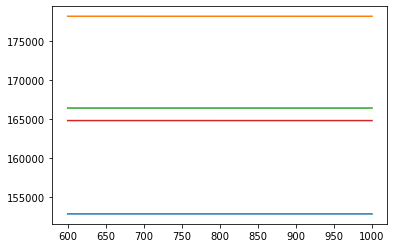

In [11]:
for i in range(4):
    plt.plot(np.arange(600, len(loss_trend[i])+1), loss_trend[i][599:])